In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


jac_FHN (generic function with 1 method)

In [2]:
using JLD2, CairoMakie, MAT

In [3]:
cd("/home/sergey/work/repo/dynamical-systems/brain rhythms")
len = 100
map_dim = " $(len)x$(len) "
name = " γY s0I rate_model params from TG RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load("/home/sergey/work/repo/dynamical-systems/LSE 100x100  γY s0I rate_model params from tg RK4 ubuntu.jld2")
#load("/home/sergey/work/repo/dynamical-systems/brain rhythms/LSE 100x100  γY s0I rate_model params from tg RK4.jld2")
Λs = Λs["Λs"]
u0s = load("/home/sergey/work/repo/dynamical-systems/u0s 100x100  γY s0I rate_model params from tg RK4 ubuntu.jld2")
u0s = u0s["u0s"];
γYrange = range( 0.0, 10.0, length = len );
s0Erange = range(0.0, 0.5, length = len);

In [4]:
cd("/home/sergey/MEGA/MatCont7p4/Systems/rate_model/diagram")
Hopf_forward = matopen("GammaY_s0I_hopf_forward.mat")
Hopf_forward = read(Hopf_forward, "x")
Hopf_backward = matopen("GammaY_s0I_hopf_backward.mat")
Hopf_backward = read(Hopf_backward, "x")

8×100 Matrix{Float64}:
 0.209926     0.209925     0.209924     …   0.235977      0.24032
 0.487715     0.48771      0.487703         0.333393      0.334148
 0.00656654   0.0065673    0.00656829       0.330654      0.343417
 0.0168305    0.0168315    0.0168327        0.249465      0.268112
 2.52479e-17  2.52458e-17  2.52431e-17      3.41695e-16   5.27523e-16
 0.418739     0.418729     0.418716     …  -0.996969     -1.09403
 4.99991      4.99891      4.99761         -2.42336      -2.41947
 0.0284374    0.0284389    0.0284409        0.201224      0.207057

In [5]:
index_gammaY = 8
index_s0I = 30
println(γYrange[index_point], " ", IErange[index_s0I])
println(u0s[index_point, index_point, :])
println(Λs[index_gammaY, index_s0I, :])

UndefVarError: UndefVarError: `index_point` not defined

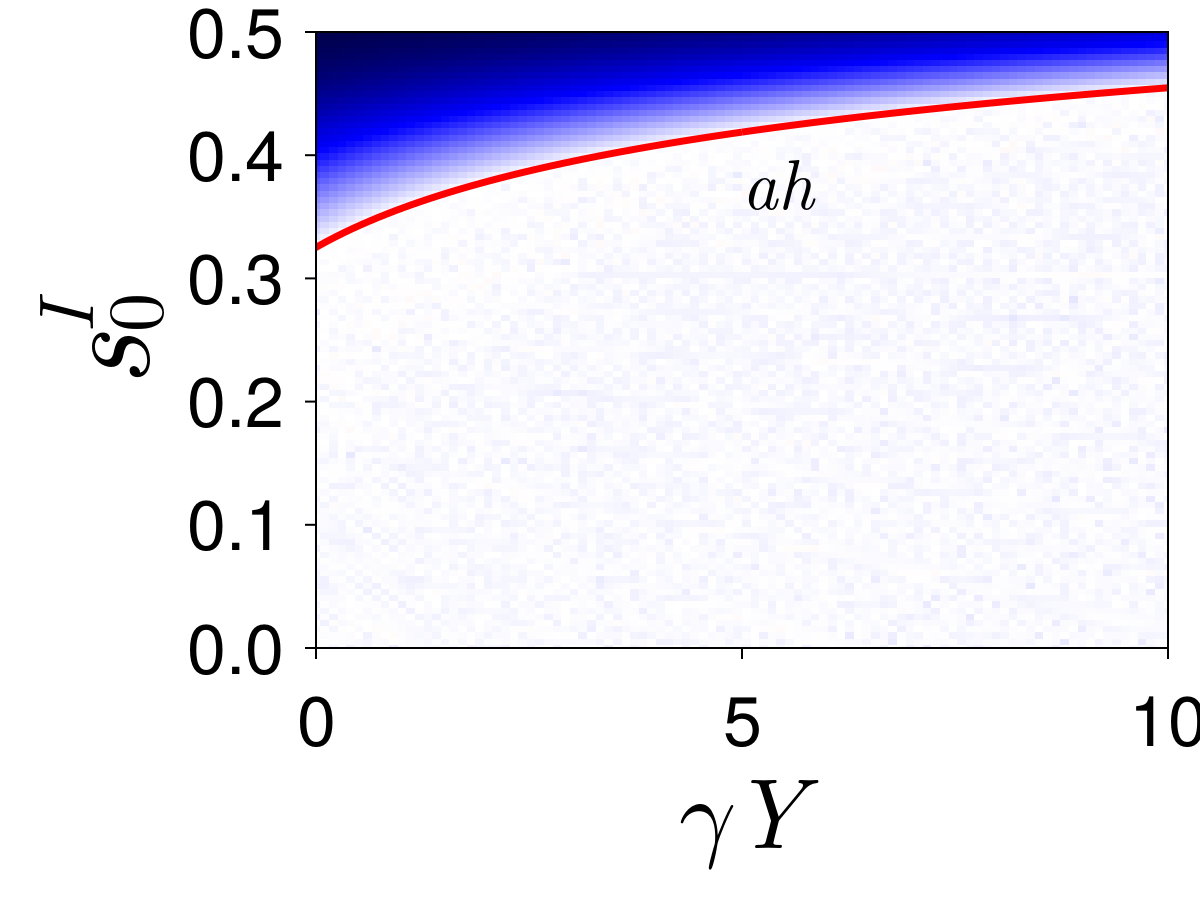

In [6]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 3.5
mksize = 12

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"s_{0}^{I}", xlabelsize = 50, ylabelsize = 65,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, s0Erange, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))
lines!(ax, Hopf_forward[7, :], Hopf_forward[6, :], color = :red, linewidth = lw)
lines!(ax, Hopf_backward[7, :], Hopf_backward[6, :], color = :red, linewidth = lw)

text!(ax, 5.0, 0.345, text = L"ah", fontsize = ticksize)

xlims!(ax, 0.0, 10.0)
ylims!(ax, 0.0, 0.5)
display(f);

In [7]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/rate_model/images/maps/"
filename = "gammaY_s0I_params_from_tg_RK4.pdf"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{PDF}
